# Cryptocurrency Investment Strategy
### Previously, I was involved in the cryptocurrency field, in part due to the craze that caught my attention. I do believe that the value of these currencies are probably not justified at this point in time. However, I believe there’s still an opportunity to make some profits with these currencies by trading them.

### Hence, I will try to cover trading strategies as and when I can to show what works and what doesn't.

### Strategy:
> Moving Average Crossover Trading Strategy Backtest (MACD)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("/Users/soonleqi/Downloads/all_currencies.csv")
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [4]:
# Remove all NaN values in Market Cap column
df2=df.dropna(subset=['Market Cap'])
df2.reset_index(drop = True, inplace = True)
df2.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,29,2015-12-11,$$$,0.000050,0.000050,0.000022,0.000027,1.0,2287.0
1,30,2015-12-12,$$$,0.000027,0.000044,0.000021,0.000043,0.0,1245.0
2,31,2015-12-13,$$$,0.000043,0.000044,0.000022,0.000022,2.0,1996.0
3,32,2015-12-14,$$$,0.000022,0.000022,0.000022,0.000022,3.0,994.0
4,33,2015-12-15,$$$,0.000022,0.000023,0.000022,0.000023,2.0,1018.0


In [5]:
# Top 20 cryptocurrencies in market
Top_20_coins=df2.sort_values(['Date','Market Cap'], ascending = False).head(20)

In [6]:
Top_20_coins.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
75904,1861,2018-06-02,BTC,7536.720000,7695.830000,7497.260000,7643.450000,4.939300e+09,1.286450e+11
181767,1030,2018-06-02,ETH,580.430000,597.080000,577.320000,591.810000,1.880390e+09,5.793290e+10
542248,1763,2018-06-02,XRP,0.623462,0.648982,0.619477,0.643451,3.152060e+08,2.446560e+10
42017,314,2018-06-02,BCH,1003.330000,1093.860000,996.590000,1084.780000,6.891210e+08,1.721740e+10
283744,1861,2018-06-02,LTC,119.830000,123.890000,118.950000,123.310000,3.108000e+08,6.805430e+09


In [7]:
len(Top_20_coins['Symbol'].unique())

20

# Overall Market Capitalization of Cryptocurrencies

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace1 = go.Bar(
    x = Top_20_coins["Symbol"].tolist(),
    y = Top_20_coins["Market Cap"].tolist(),
    name='Country Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

layout = go.Layout(
    barmode='stack',
    title = 'Market capitalization across cryptos',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Market Cap',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Coin'),
    yaxis2=dict(
        title='Country Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 200
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/Users/soonleqi/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
df2.columns

Index(['Unnamed: 0', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Market Cap'],
      dtype='object')

In [10]:
df3 = df2[df2['Symbol']=='BTC']
df4 = df3.set_index('Date')
df4.head()

,Unnamed: 0,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2013-04-28,0,BTC,135.30,135.98,132.10,134.21,NaN,1.500520e+09
2013-04-29,1,BTC,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2013-04-30,2,BTC,144.00,146.93,134.05,139.00,NaN,1.597780e+09
2013-05-01,3,BTC,139.00,139.89,107.72,116.99,NaN,1.542820e+09
2013-05-02,4,BTC,116.38,125.60,92.28,105.21,NaN,1.292190e+09


In [11]:
df5 = df4['Close']

In [12]:
df5.head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

# Visualization of Bitcoin Price History

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64


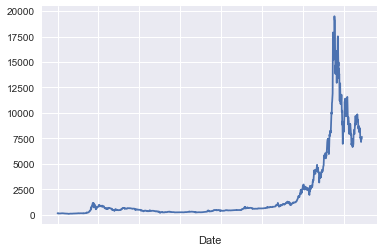

In [13]:
from matplotlib import pyplot
series = df5
print(series.head())
series.plot()
pyplot.show()

# Ethereum Investment Strategy (by Moving Averages)
#### We will have 3 basic states/rules:

1) Buy Signal (go long) – the 20d moving average is for the first time X points above the 40d tend.

2) Park in Cash – no position.

3) Sell Signal (go short) – the 20d moving average is for the first time X points below the 40d trend.

> The first step in creating these signals is to add a new column to the DataFrame which is just the difference between the two moving averages:

In [14]:
# 20 days Moving average
df2['20d'] = np.round(df2['Close'].rolling(window=20).mean(),2)
# 40 days Moving average
df2['40d'] = np.round(df2['Close'].rolling(window=40).mean(),2)
df2.tail()

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap,20d,40d
561294,189,2018-05-29,ZZC,0.097595,0.101948,0.082738,0.083027,590.0,189967.0,0.14,0.13
561295,190,2018-05-30,ZZC,0.083082,0.118589,0.056165,0.082957,263.0,161719.0,0.14,0.13
561296,191,2018-05-31,ZZC,0.082941,0.123240,0.082536,0.121377,52.0,161444.0,0.14,0.13
561297,192,2018-06-01,ZZC,0.071372,0.102548,0.071372,0.100614,47.0,138924.0,0.14,0.13
561298,193,2018-06-02,ZZC,0.100570,0.100657,0.059969,0.089404,63.0,195759.0,0.14,0.13


/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



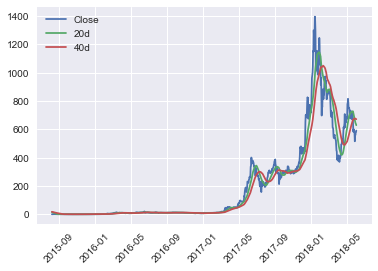

In [15]:
import matplotlib.pyplot as plt
df3 = df2[df2['Symbol']=='ETH']
df3['DateTime'] = pd.to_datetime(df3['Date'])
plt.xticks(rotation=45)
plt.plot(df3['DateTime'],df3[['Close','20d','40d']])
plt.legend(['Close','20d','40d'])

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



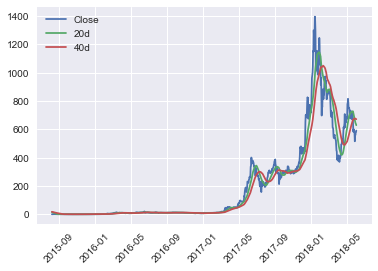

In [18]:
import matplotlib.pyplot as plt
df3 = df2[df2['Symbol']=='ETH']
df3['DateTime'] = pd.to_datetime(df3['Date'])
plt.xticks(rotation=45)
plt.plot(df3['DateTime'],df3[['Close','20d','40d']])
plt.legend(['Close','20d','40d'])

In [19]:
df3['20-40'] = df3['20d'] - df3['40d']
X= 20
df3['Stance'] = np.where(df3['20-40'] > X, 1, 0)
df3['Stance'] = np.where(df3['20-40'] < X, -1, df3['Stance'])
df3['Stance'].value_counts()

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

-1    853
 1    177
Name: Stance, dtype: int64

# Interpretation of result

The above results shows that during the time period we have chosen to backtest, on 855 trading dates the 20d moving average lies more than 20 points below the 40d moving average, and on 177 the 20d moving average lies more than 20 points above the 40d moving average.

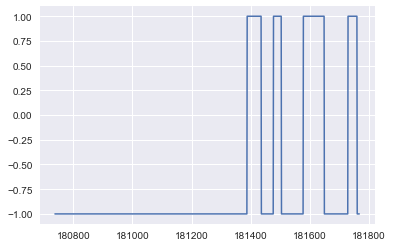

In [20]:
df3['Stance'].plot(lw=1.5,ylim=[-1.1,1.1])

Everything is now in place to test our investment strategy based upon the signals we have generated. In this instance we assume for simplicity that ETH can be bought or sold directly and that there are no transaction costs.

So in this model, our investor is either long the market, short the market or flat – this allows us to work with market returns and simply multiply the day’s market return by -1 if he is short, 1 if he is long and 0 if he is flat the previous day.

In [21]:
df4_for_later_use = df3
df3.tail()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap,20d,40d,DateTime,20-40,Stance
181763,1026,2018-05-29,ETH,516.15,572.26,516.15,565.39,2.330820e+09,5.147440e+10,655.61,676.67,2018-05-29,-21.06,-1
181764,1027,2018-05-30,ETH,566.83,583.14,545.43,559.59,2.053970e+09,5.654050e+10,647.23,675.27,2018-05-30,-28.04,-1
181765,1028,2018-05-31,ETH,558.50,585.54,557.07,577.64,1.985040e+09,5.572080e+10,642.13,674.57,2018-05-31,-32.44,-1
181766,1029,2018-06-01,ETH,578.67,589.09,567.66,580.04,1.945890e+09,5.774570e+10,636.83,673.53,2018-06-01,-36.70,-1
181767,1030,2018-06-02,ETH,580.43,597.08,577.32,591.81,1.880390e+09,5.793290e+10,629.74,672.26,2018-06-02,-42.52,-1


In [22]:
df3['Market Returns'] = np.log(df3['Close'] / df3['Close'].shift(1))
df3['Strategy'] = df3['Market Returns'] * df3['Stance'].shift(1)

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/soonleqi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



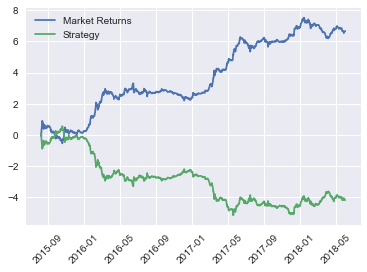

In [23]:
plt.plot(df3['DateTime'],df3[['Market Returns','Strategy']].cumsum())
plt.xticks(rotation=45)
plt.legend(['Market Returns','Strategy'])

# Analysis of results

So we can see that although the strategy seems to perform rather well during market downturns, it doesn’t do so well during market rallies or when it is just trending upwards.

Over the test period it barely outperforms a simple buy and hold strategy, hardly enough to call it a “successful” strategy. THIS STRATEGY IS USELESS (jk please read on...)

Maybe we shouldn't conclude so soon. There was a huge rally due to the cryptocurrency craze in 2017. Let's examine the strategy on Feb - May 2018 after the bitcoin bubble burst to see if the analysis paints a different picture.

## Let us try zooming into the time horizon Feb - May 2018

In [24]:
df5 = df4_for_later_use[(df4_for_later_use['Date'] > '2018-02-01') & (df4_for_later_use['Date'] < '2018-05-01')]
df5.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap,20d,40d,DateTime,20-40,Stance,Market Returns,Strategy
181647,910,2018-02-02,ETH,1035.77,1035.77,757.98,915.78,6.713290e+09,1.008360e+11,1092.18,1035.82,2018-02-02,56.36,1,-0.124109,-0.124109
181648,911,2018-02-03,ETH,919.21,991.94,847.69,964.02,3.243480e+09,8.950760e+10,1072.05,1040.77,2018-02-03,31.28,1,0.051336,0.051336
181649,912,2018-02-04,ETH,964.67,969.03,805.06,834.68,2.997090e+09,9.395340e+10,1049.18,1042.29,2018-02-04,6.89,-1,-0.144064,-0.144064
181650,913,2018-02-05,ETH,834.96,856.65,644.60,697.95,4.269530e+09,8.133740e+10,1031.40,1040.67,2018-02-05,-9.27,-1,-0.178901,0.178901
181651,914,2018-02-06,ETH,707.74,796.44,574.42,793.12,6.518270e+09,6.895870e+10,1020.34,1042.07,2018-02-06,-21.73,-1,0.127827,-0.127827


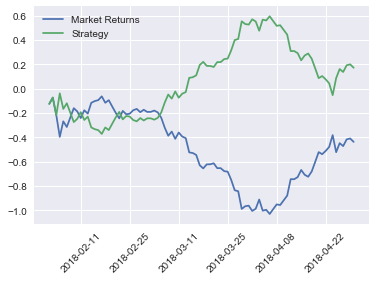

In [25]:
plt.plot(df5['DateTime'],df5[['Market Returns','Strategy']].cumsum())
plt.xticks(rotation=45)
plt.legend(['Market Returns','Strategy'])

# Final Verdict
There we go, the trading strategy actually shows huge potential when the markets are less bullish, huge gains would have been made within the last couple of months if this was actually implemented!

And we are done! A moving average cross over strategy backtested in Python! :)